## Name : Tazmeen Afroz
## Roll no : 22P-9252
## Section : BAI-5A
### Assignment 01

### Initial Data Loading and Exploration

##### In this section, we load the dataset and perform initial exploratory data analysis.


In [106]:

import seaborn as sns


df = sns.load_dataset('mpg')

df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [108]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## Data Cleaning and Preprocessing
 
#### Here, we handle missing values and identify numerical and categorical columns.

In [109]:
import pandas as pd
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


df['horsepower']= df['horsepower'].fillna(df['horsepower'].median())


In [110]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')
Index(['origin', 'name'], dtype='object')


## Data Visualization

##### This section includes various visualizations to better understand the dataset.


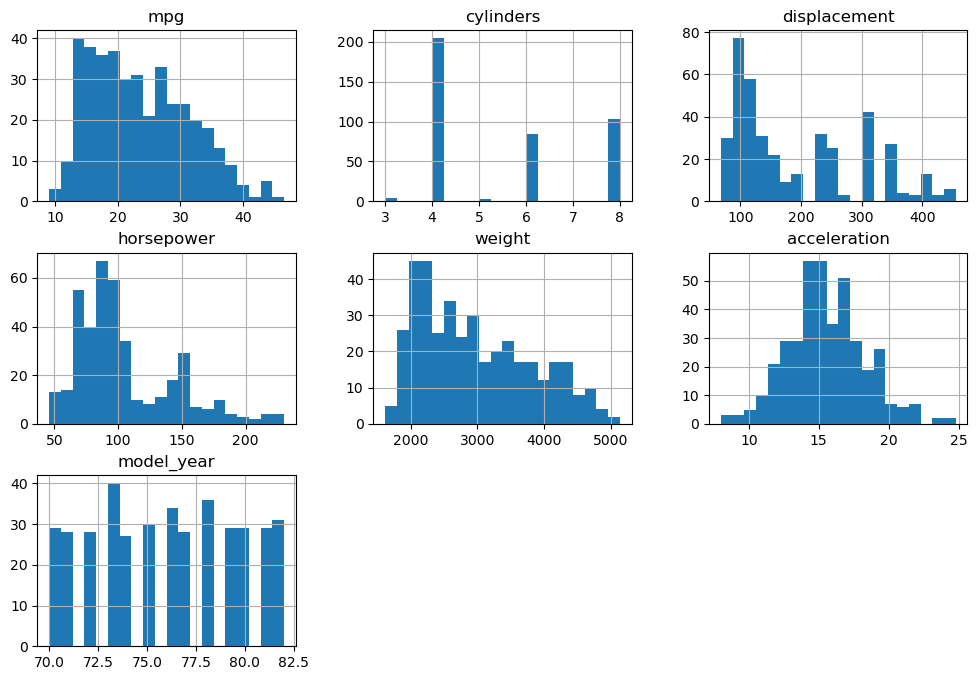

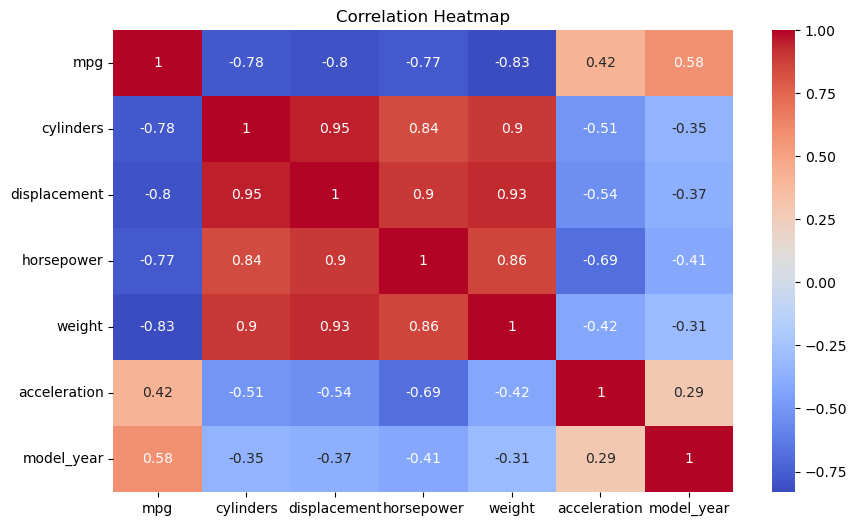

In [111]:
import matplotlib.pyplot as plt

# Plot histograms
df.hist(bins=20, figsize=(12, 8))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


## Task 1: Custom Transformation Using FunctionTransformer

##### In this task, we create and apply custom transformers using Scikit-Learn's FunctionTransformer.


##### as from the  histogram we can see that the displacement and weight have a heavy tail so we can apply log transformation to them

In [112]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log,inverse_func=np.exp)

# as from the  histogram we can see that the displacement and weight have a heavy tail so we can apply log transformation to them
df['log_displacement'] = log_transformer.transform(df[['displacement']])
df['log_weight'] = log_transformer.transform(df[['weight']])
# Step 2: Create a ratio transformer (horsepower to weight)
ratio_transformer = FunctionTransformer(lambda X: X[:, 0] / X[:, 1])

# Apply the ratio transformer to horsepower and weight
df['horsepower_to_weight'] = ratio_transformer.transform(df[['horsepower', 'weight']].values)


df[['displacement', 'log_displacement', 'weight', 'log_weight', 'horsepower_to_weight']].head()


,displacement,log_displacement,weight,log_weight,horsepower_to_weight
0,307.0,5.726848,3504,8.161660,0.037100
1,350.0,5.857933,3693,8.214194,0.044679
2,318.0,5.762051,3436,8.142063,0.043655
3,304.0,5.717028,3433,8.141190,0.043694
4,302.0,5.710427,3449,8.145840,0.040591


## Task 2: Building Custom Transformer Class
 
#### Here, we create a custom StandardScalerClone transformer by subclassing BaseEstimator and TransformerMixin.


In [113]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

# Here    => StandardScalerClone is defined as a subclass of both BaseEstimator and TransformerMixin, allowing it to behave like a Scikit-Learn transformer

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
    
    def fit(self, X, y=None):
        X = check_array(X)              # input validation to ensure that X is an integer or floating-point array
        self.mean_ = X.mean(axis=0)     # axis=0 to calculate the mean of each feature 
        self.scale_ = X.std(axis=0)     # standard deviation of each feature
        self.n_features_in_ = X.shape[1] # number of features
        return self
    
    def transform(self, X):
        check_is_fitted(self)        # check if the estimator is fitted by verifying the presence of the attributes mean_ and scale_ 
        X = check_array(X)   
        assert self.n_features_in_ == X.shape[1]         # check if the number of features in X is equal to the number of features in the fitted data   
        if self.with_mean:
            X = X - self.mean_             # calculate the mean of each feature and subtract it from the original value
        return X / self.scale_             # divide the result by the standard deviation of each feature
    
    def get_feature_names_out(self, input_features=None):
        check_is_fitted(self)
        if input_features is None:
            input_features = [f"x{i}" for i in range(self.n_features_in_)]
        return np.asarray(input_features, dtype=object)


scaler = StandardScalerClone()
df['horsepower_scaled'] = scaler.fit_transform(df[['horsepower']])

df[['horsepower', 'horsepower_scaled']].head()


,horsepower,horsepower_scaled
0,130.0,0.673118
1,165.0,1.589958
2,150.0,1.197027
3,150.0,1.197027
4,140.0,0.935072


## Task 3: Clustering-Based Custom Transformer

##### In this task, we implement a clustering-based transformer using K-Means and RBF kernel.

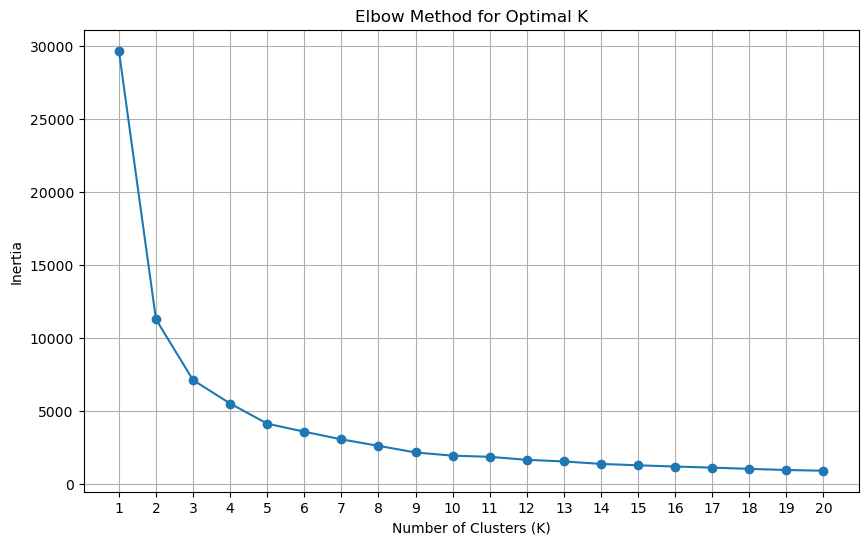

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df[['mpg', 'model_year']]


inertia = []
k_values = range(1, 21) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
 
 def __init__(self, n_clusters=4, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state
 
 def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters,
    random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self
 def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_,
    gamma=self.gamma)
 
 def get_feature_names_out(self, names=None):
    return [f"Cluster {i} similarity" for i in
    range(self.n_clusters)]

cluster_simil = ClusterSimilarity(n_clusters=4, gamma=0.1, random_state=42) # no of clusters based on the elbow method # gamma value is set to a low value to avoid overfitting 

similarities =cluster_simil.fit_transform(df[['model_year', 'mpg']])

# Convert similarities to DataFrame for inspection
similarities[:3].round(2)



array([[0.  , 0.  , 0.19, 0.01],
       [0.  , 0.  , 0.57, 0.  ],
       [0.  , 0.  , 0.19, 0.01]])

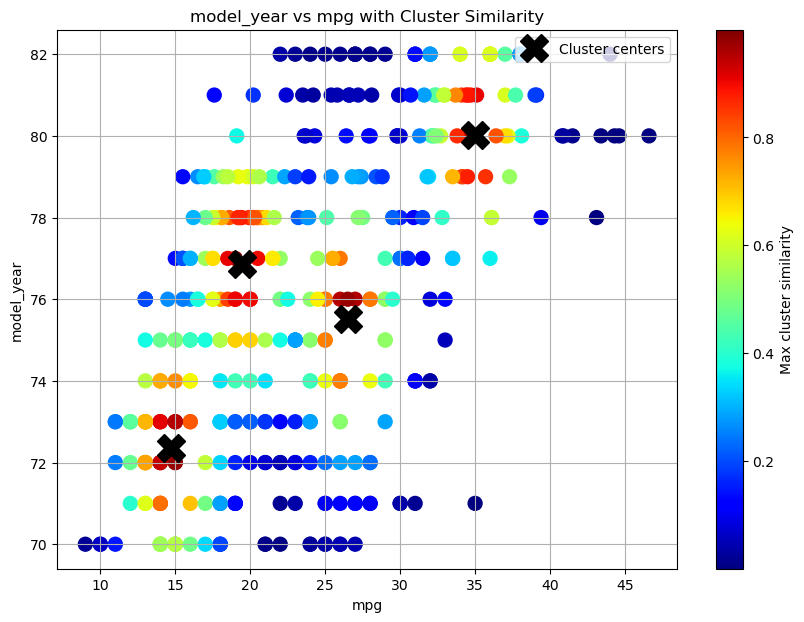

In [116]:

df_renamed = df.rename(columns={
    "model_year": "model_year",
    "mpg": "mpg"
})


df_renamed["Max cluster similarity"] = similarities.max(axis=1)


df_renamed.plot(kind="scatter", x="mpg", y="model_year", grid=True,
                s=100,  
                c="Max cluster similarity", cmap="jet", colorbar=True,
                legend=True, sharex=False, figsize=(10, 7))

plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],  # mpg
         cluster_simil.kmeans_.cluster_centers_[:, 0],  # model_year
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")

# Add legend and display the plot
plt.legend(loc="upper right")
plt.title('model_year vs mpg with Cluster Similarity')
plt.show()


## Task 4: Pipelines and ColumnTransformers

#### In this final task, we combine all transformers into a pipeline and apply them to both numerical and categorical features.


In [117]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScalerClone())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False))
])

# Combine into a ColumnTransformer
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_columns),
    ('cat', cat_pipeline, categorical_columns)
], verbose_feature_names_out=False)

df_prepared = full_pipeline.fit_transform(df)



In [118]:
print(df_prepared)

[[-0.7064387   1.49819126  1.0906037  ...  0.          0.
   0.        ]
 [-1.09075062  1.49819126  1.5035143  ...  0.          0.
   0.        ]
 [-0.7064387   1.49819126  1.19623199 ...  0.          0.
   0.        ]
 ...
 [ 1.08701694 -0.85632057 -0.56103873 ...  0.          0.
   0.        ]
 [ 0.57460104 -0.85632057 -0.70507731 ...  0.          0.
   0.        ]
 [ 0.95891297 -0.85632057 -0.71467988 ...  0.          0.
   0.        ]]


In [119]:
feature_names = full_pipeline.get_feature_names_out()
df_prepared_with_names = pd.DataFrame(df_prepared, columns=feature_names, index=df.index)

print("Shape of prepared data:", df_prepared_with_names.shape)
print("\nFirst few rows of prepared data with column names:")
print(df_prepared_with_names.head())


Shape of prepared data: (398, 315)

First few rows of prepared data with column names:
        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.706439   1.498191      1.090604    0.673118  0.630870     -1.295498   
1 -1.090751   1.498191      1.503514    1.589958  0.854333     -1.477038   
2 -0.706439   1.498191      1.196232    1.197027  0.550470     -1.658577   
3 -0.962647   1.498191      1.061796    1.197027  0.546923     -1.295498   
4 -0.834543   1.498191      1.042591    0.935072  0.565841     -1.840117   

   model_year  origin_europe  origin_japan  origin_usa  ...  \
0   -1.627426            0.0           0.0         1.0  ...   
1   -1.627426            0.0           0.0         1.0  ...   
2   -1.627426            0.0           0.0         1.0  ...   
3   -1.627426            0.0           0.0         1.0  ...   
4   -1.627426            0.0           0.0         1.0  ...   

   name_volvo 145e (sw)  name_volvo 244dl  name_volvo 245  name_volvo 264gl  

In [120]:
feature_names = full_pipeline.get_feature_names_out()
df_prepared_with_names = pd.DataFrame(df_prepared, columns=feature_names, index=df.index)

df_prepared_with_names.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
